# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [45]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

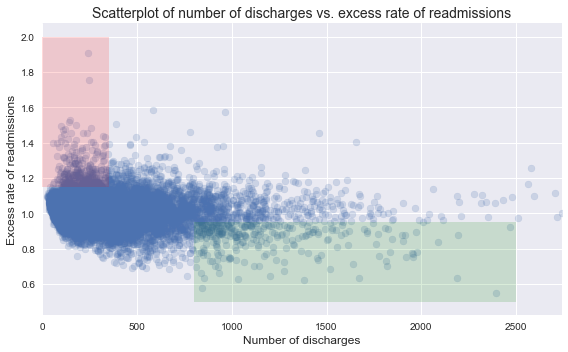

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [ ]:
# Your turn

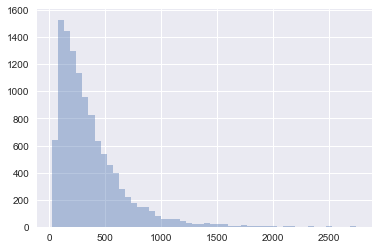

In [8]:
sns.distplot(x, kde=False)
#long tail, skwewd to the right

In [9]:
clean_hospital_read_df.head(10)

Hospital Name  Provider Number State  \
16857           THREE RIVERS MEDICAL CENTER           180128    KY   
14582  SELLS INDIAN HEALTH SERVICE HOSPITAL            30074    AZ   
15606     PHS INDIAN HOSPITAL AT PINE RIDGE           430081    SD   
15615    FLORIDA STATE HOSPITAL UNIT 31 MED           100298    FL   
14551                GREENE COUNTY HOSPITAL            10051    AL   
15625         FAIRVIEW DEVELOPMENTAL CENTER            50548    CA   
15642            WAGONER COMMUNITY HOSPITAL           370166    OK   
15648     ST LUKE'S HOSPITAL AT THE VINTAGE           670075    TX   
15652         SOUTH TEXAS SURGICAL HOSPITAL           670061    TX   
15396        GEORGE L MEE MEMORIAL HOSPITAL            50189    CA   

                 Measure Name  Number of Discharges  Footnote  \
16857  READM-30-HIP-KNEE-HRRP                     0       7.0   
14582      READM-30-COPD-HRRP                     0       7.0   
15606       READM-30-AMI-HRRP                     0       7.0   
15615      READM-30-COPD-HRRP                     0       7.0   
14551       READM-30-AMI-HRRP                     0       7.0   
15625        READM-30-HF-HRRP                     0       7.0   
15642       READM-30-AMI-HRRP                     0       7.0   
15648  READM-30-HIP-KNEE-HRRP                     0       7.0   
15652      READM-30-COPD-HRRP                     0       7.0   
15396       READM-30-AMI-HRRP                     0       7.0   

       Excess Readmission Ratio  Predicted Readmission Rate  \
16857                       NaN                         NaN   
14582                       NaN                         NaN   
15606                       NaN                         NaN   
15615                       NaN                         NaN   
14551                       NaN                         NaN   
15625                       NaN                         NaN   
15642                       NaN                         NaN   
15648                       NaN                         NaN   
15652                       NaN                         NaN   
15396                       NaN                         NaN   

       Expected Readmission Rate  Number of Readmissions  Start Date  \
16857                        NaN                     NaN  07/01/2010   
14582                        NaN                     NaN  07/01/2010   
15606                        NaN                     NaN  07/01/2010   
15615                        NaN                     NaN  07/01/2010   
14551                        NaN                     NaN  07/01/2010   
15625                        NaN                     NaN  07/01/2010   
15642                        NaN                     NaN  07/01/2010   
15648                        NaN                     NaN  07/01/2010   
15652                        NaN                     NaN  07/01/2010   
15396                        NaN                     NaN  07/01/2010   

         End Date  
16857  06/30/2013  
14582  06/30/2013  
15606  06/30/2013  
15615  06/30/2013  
14551  06/30/2013  
15625  06/30/2013  
15642  06/30/2013  
15648  06/30/2013  
15652  06/30/2013  
15396  06/30/2013

In [10]:
clean_hospital_read_df.describe()

Provider Number  Number of Discharges  Footnote  \
count     11578.000000          11578.000000      81.0   
mean     257681.537226            362.909397       7.0   
std      154542.645531            309.176945       0.0   
min       10001.000000              0.000000       7.0   
25%      110129.750000            157.000000       7.0   
50%      250040.000000            280.000000       7.0   
75%      390041.000000            472.750000       7.0   
max      670082.000000           6793.000000       7.0   

       Excess Readmission Ratio  Predicted Readmission Rate  \
count              11497.000000                11497.000000   
mean                   1.007504                   17.984292   
std                    0.091964                    5.487651   
min                    0.549500                    2.700000   
25%                    0.952600                   16.300000   
50%                    1.003500                   19.000000   
75%                    1.058100                   21.500000   
max                    1.909500                   32.800000   

       Expected Readmission Rate  Number of Readmissions  
count               11497.000000            11497.000000  
mean                   17.865695               63.633731  
std                     5.240749               59.540296  
min                     3.900000               11.000000  
25%                    16.600000               24.000000  
50%                    19.000000               45.000000  
75%                    21.400000               82.000000  
max                    28.000000              879.000000

In [11]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [12]:
clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Number of Readmissions'],
                              inplace=True)


In [13]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [15]:
discharge_over_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
discharge_over_1000 = discharge_over_1000.groupby(by='Measure Name')
discharge_over_1000 = discharge_over_1000['Excess Readmission Ratio'].mean()
discharge_over_1000.head()

Measure Name
READM-30-AMI-HRRP         0.981768
READM-30-COPD-HRRP        1.027584
READM-30-HF-HRRP          0.997435
READM-30-HIP-KNEE-HRRP    0.919898
READM-30-PN-HRRP          1.016582
Name: Excess Readmission Ratio, dtype: float64

In [17]:

hospitals1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
hospitals2 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
hospitals1_size = len(hospitals1)
hospitals2_size = len(hospitals2)
all_hospitals_size = len(clean_hospital_read_df)




# z-score
#z_score = (sample_dist_mean_diff - sample_mean_diff) / sample_dist_std_diff
#print 'Z-Score =',z_score

# p-Value
#p_value = stats.norm.cdf(z_score)
#print 'P-Value =',p_value

In [23]:
sample_mean1 = hospitals1['Excess Readmission Ratio'].mean()
sample_mean2 = hospitals2['Excess Readmission Ratio'].mean()
sample_var1 = hospitals1['Excess Readmission Ratio'].var()
sample_var2 = hospitals2['Excess Readmission Ratio'].var()
print(sample_mean1)
print(sample_mean2)
print(sample_var1)
print(sample_var2)

1.02261835017
0.978335421166
0.003361518433
0.0144017648898


In [25]:
sample_differnce_mean = sample_mean1 - sample_mean2
print(sample_differnce_mean)

0.044282929002


In [27]:
sample_dist_var_difference = (sample_var1/hospitals1_size) + (sample_var2/hospitals2_size)
print(sample_dist_var_difference)


3.39348847066e-05


In [37]:
sample_dist_mean_difference = 0
sample_dist_std_difference = np.sqrt(sample_dist_var_difference)

In [38]:
z_score = (sample_dist_mean_difference - sample_differnce_mean) / sample_dist_std_difference

In [47]:
print(z_score)

p_value = scipy.stats.norm.cdf(z_score)
print(p_value)

#we can reject the null hypothesis. The # of discharges affects the number of readmissions. 


-7.6017424185
1.4608491839e-14
